## [Luis Alejandro Rodríguez Arenas](https://luigitoby.github.io/)
## Cod. 202321287
# Taller 2

# Librerías

In [29]:
from sympy import symbols, Matrix, pi, cos, sin, simplify, eye, solve, latex, atan2, pprint, init_printing, Derivative, sqrt, diff
from sympy.physics.vector import dynamicsymbols, init_vprinting, ReferenceFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
init_vprinting(use_latex='mathjax')

# Ejercicio 1


In [21]:
# Definimos nuestras variables
mag_a, mag_b, mag_c, ang1, ang2, ang3 = symbols('mag_a mag_b mag_c ang1 ang2 ang3')

# Establecemos un Reference Frame
N=ReferenceFrame("N")

# Definimos nuestros vectores
a = N.x*mag_a*cos(ang1) + N.y*mag_a*sin(ang1)
b = N.x*mag_b*cos(ang2) + N.y*mag_b*sin(ang2)
c = N.x*mag_c*cos(ang3) + N.y*mag_c*sin(ang3)

# Diccionario para sustituir valores (Pasamos a radianes también)
subs_dict = {
    mag_a: 10,
    mag_b: 20,
    mag_c: 35,
    ang1: 90*pi/180,
    ang2: 53*pi/180,
    ang3: -32*pi/180
}

# Evaluamos componentes, básicamente haces producto punto con el eje cuya componente queremos
# y evaluamos sustituyendo el dict con los valores del problema.
a_x_val = a.dot(N.x).evalf(subs=subs_dict)
a_y_val = a.dot(N.y).evalf(subs=subs_dict)
b_x_val = b.dot(N.x).evalf(subs=subs_dict)
b_y_val = b.dot(N.y).evalf(subs=subs_dict)
c_x_val = c.dot(N.x).evalf(subs=subs_dict)
c_y_val = c.dot(N.y).evalf(subs=subs_dict)

# Mostrar resultados
print(f"a_x = {a_x_val:.4f}, a_y = {a_y_val:.4f}")
print(f"b_x = {b_x_val:.4f}, b_y = {b_y_val:.4f}")
print(f"c_x = {c_x_val:.4f}, c_y = {c_y_val:.4f}")

R = a+b+c # Resultante
R_mag = (R).magnitude().evalf(subs=subs_dict)  # Magnitud de la resultante
R_ang = atan2(R.dot(N.y), R.dot(N.x)).evalf(subs=subs_dict)  # en radianes

R_x_val = R.dot(N.x).evalf(subs=subs_dict)
R_y_val = R.dot(N.y).evalf(subs=subs_dict)

print(f"R_x = {R_x_val:.4f}, R_y = {R_y_val:.4f}")
print(f"|R| = {R_mag:.4f}")
print(f"Ángulo = {(R_ang*180/pi):.2f}°") # Ángulo de la resultante con cuidado de pasarlo a grados


# Proyecciones sobre R

def proj(u, v):
    return (u.dot(v) / (v.dot(v))) * v

proy_a = proj(a, R).evalf(subs=subs_dict)
proy_b = proj(b, R).evalf(subs=subs_dict)
proy_c = proj(c, R).evalf(subs=subs_dict)

# Dejo funcion que da la magnitud de una vez para futuro uso
def comp(u, v):
    return u.dot(v) / v.magnitude()

# Mostrar
print(f"Proyección de a sobre R: {proy_a}")
print(f"Proyección de b sobre R: {proy_b}")
print(f"Proyección de c sobre R: {proy_c}")
print(f"Magnitud de proyección de a sobre R: {proy_a.magnitude()}")
print(f"Magnitud de proyección de b sobre R: {proy_b.magnitude()}")
print(f"Magnitud de proyección de c sobre R: {proy_c.magnitude()}")


a_x = -0.0000, a_y = 10.0000
b_x = 12.0363, b_y = 15.9727
c_x = 29.6817, c_y = -18.5472
R_x = 41.7180, R_y = 7.4255
|R| = 42.3737
Ángulo = 10.09°
Proyección de a sobre R: 1.72527667552181*N.x + 0.307088282004401*N.y
Proyección de b sobre R: 14.4224142154087*N.x + 2.56709805830196*N.y
Proyección de c sobre R: 25.5702929375854*N.x + 4.55134961247732*N.y
Magnitud de proyección de a sobre R: 1.75239345469104
Magnitud de proyección de b sobre R: 14.6490963626348
Magnitud de proyección de c sobre R: 25.9721902081616


# Ejercicio 2

In [22]:
from sympy import symbols, pi, atan2
from sympy.physics.mechanics import ReferenceFrame

# --- Definimos magnitudes y ángulos ---
v1, v2 = symbols('v1 v2')
ang1 = 30*pi/180      # 30 grados en radianes
ang2 = atan2(4, 3)    # ángulo en segundo cuadrante

# --- Creamos un marco de referencia cartesiano ---
N = ReferenceFrame('N')

# --- Definimos los vectores ---
# Sympy permite definir directamente en polares: orientnew + unit vectors
# pero aquí los armamos como combinaciones en X,Y
a = v1 * (N.x*cos(ang1) + N.y*sin(ang1))
b = v2 * (N.x*cos(ang2) + N.y*sin(ang2))

# --- Operaciones vectoriales ---
suma   = a + b
resta  = a - b
dot_ab = a.dot(b)
cross_ab = a.cross(b)

# --- Resultados ---
print("a =", a)
print("b =", b)
print("a + b =", suma)
print("a - b =", resta)
print("a · b =", dot_ab)
print("a × b =", cross_ab)


a = sqrt(3)*v1/2*N.x + v1/2*N.y
b = 3*v2/5*N.x + 4*v2/5*N.y
a + b = (sqrt(3)*v1/2 + 3*v2/5)*N.x + (v1/2 + 4*v2/5)*N.y
a - b = (sqrt(3)*v1/2 - 3*v2/5)*N.x + (v1/2 - 4*v2/5)*N.y
a · b = 2*v1*v2/5 + 3*sqrt(3)*v1*v2/10
a × b = (-3*v1*v2/10 + 2*sqrt(3)*v1*v2/5)*N.z


# Ejercicio 3 - Implementación más eficiente

In [23]:
t = symbols('t') # tiempo
# variables dinámicas
l = dynamicsymbols('l')         # longitud expuesta [mm]
theta = dynamicsymbols('theta') # ángulo [rad]

# tasas constantes
ld = -150        # [mm/s]
thetad = pi/3    # [rad/s] (60 deg/s)

# longitud total = parte fija + expuesta
l0 = 375         # [mm]
L = l0 + l       # [mm]

# marcos
N = ReferenceFrame('N')
A = N.orientnew('A', 'Axis', (theta, N.z))

# posición de B
r = L * A.x

# velocidad y aceleración
v = r.diff(t, N)
a = v.diff(t, N)

# se asume θ̈ = 0, l̈ = 0
v = v.subs({l.diff(t, 2): 0, theta.diff(t, 2): 0})
a = a.subs({l.diff(t, 2): 0, theta.diff(t, 2): 0})

# expresar en A
vA = v.express(A).subs({l.diff(t): ld, theta.diff(t): thetad})
aA = a.express(A).subs({l.diff(t): ld, theta.diff(t): thetad})

print("Expresiones generales en A")
print("v =", vA)
print("a =", aA)
print("|v| =", vA.magnitude().simplify())
print("|a| =", aA.magnitude().simplify())

# ejemplo con l = 125 mm → L = 500 mm (https://www.youtube.com/watch?v=XFuOW2thPA8)
subs_ex = {l: 125}
v_num = vA.subs(subs_ex).simplify()
a_num = aA.subs(subs_ex).simplify()

print("\nEjemplo con l = 125 mm (L=500 mm)")
print("v =", v_num)
print("a =", a_num)
print("|v| =", v_num.magnitude().evalf(), "mm/s")
print("|a| =", a_num.magnitude().evalf(), "mm/s^2")


Expresiones generales en A
v = ((-pi*(l(t) + 375)*sin(theta(t))/3 - 150*cos(theta(t)))*cos(theta(t)) + (pi*(l(t) + 375)*cos(theta(t))/3 - 150*sin(theta(t)))*sin(theta(t)))*A.x + (-(-pi*(l(t) + 375)*sin(theta(t))/3 - 150*cos(theta(t)))*sin(theta(t)) + (pi*(l(t) + 375)*cos(theta(t))/3 - 150*sin(theta(t)))*cos(theta(t)))*A.y
a = ((-pi**2*(l(t) + 375)*sin(theta(t))/9 - 100*pi*cos(theta(t)))*sin(theta(t)) + (-pi**2*(l(t) + 375)*cos(theta(t))/9 + 100*pi*sin(theta(t)))*cos(theta(t)))*A.x + ((-pi**2*(l(t) + 375)*sin(theta(t))/9 - 100*pi*cos(theta(t)))*cos(theta(t)) - (-pi**2*(l(t) + 375)*cos(theta(t))/9 + 100*pi*sin(theta(t)))*sin(theta(t)))*A.y
|v| = sqrt(pi**2*(l(t) + 375)**2 + 202500)/3
|a| = pi*sqrt(pi**2*(l(t) + 375)**2 + 810000)/9

Ejemplo con l = 125 mm (L=500 mm)
v = - 150*A.x + 500*pi/3*A.y
a = - 500*pi**2/9*A.x - 100*pi*A.y
|v| = 544.661066910457 mm/s
|a| = 631.934638003356 mm/s^2


# Ejercicio 3 - Implementación antigua, pero con explicación de ecuaciones paso a paso

In [24]:
# Creamos simbolos
t, l_0 = symbols('t l_0')
# Creamos funciones, usamos dynamics para tener notación de newton
l = dynamicsymbols('l')
theta = dynamicsymbols('theta')

# Creamos nuevo marco de referencia que gira alrededor del eje z
N=ReferenceFrame("N")
A=N.orientnew("A", "Axis", (theta, N.z))

# Partimos de la función polar para describir la pocisión de la punta del piston
r = l*A.x
v = r.diff(t, N)
a = v.diff(t, N)

# Sustituimos las derivadas que sabemos son cero
subs = {
    Derivative(l, t, 2): 0,
    Derivative(theta, t, 2): 0
}

v = v.subs(subs).simplify()
a = a.subs(subs).simplify()

print("Expresiones generales")
display(v.express(A).simplify())
display(a.express(A).simplify())

# Remplazamos los datos del problema
subs2 = {
    Derivative(l, t, 1): -150,
    Derivative(theta, t, 1): 60*pi/180,
    l : 375 + l_0
}
print("Expresiones generales con datos del problema")

v = v.subs(subs2).simplify()
a = a.subs(subs2).simplify()

display(v.express(A).simplify())
display(a.express(A).simplify())

print("Magnitudes, la primera es velocidad, la segunda aceleración")

display(v.express(A).magnitude().simplify())
display(a.express(A).magnitude().simplify())


# Ahora para resolver si l_0 = 125mm, simplemente remplazaré l por 500, para simplificar todo
subs3 = {
    l_0: 125
}

v = v.subs(subs3).simplify()
a = a.subs(subs3).simplify()

print('Ejemplo con l= 125mm, primer resultado es la velocidad, segundo la aceleración (Así miramos si esta bien o no el resultado comparando con internet (https://www.youtube.com/watch?v=XFuOW2thPA8)')

display(v.express(A).simplify().magnitude().evalf())
display(a.express(A).simplify().magnitude().evalf())



Expresiones generales


l̇ a_x + l⋅θ̇ a_y

    2                
-l⋅θ̇  a_x + 2⋅l̇⋅θ̇ a_y

Expresiones generales con datos del problema


           π⋅(l₀ + 375)    
-150 a_x + ──────────── a_y
                3          

  2                             
-π ⋅(l₀ + 375)                  
─────────────── a_x + -100⋅π a_y
       9                        

Magnitudes, la primera es velocidad, la segunda aceleración


   _________________________
  ╱  2           2          
╲╱  π ⋅(l₀ + 375)  + 202500 
────────────────────────────
             3              

     _________________________
    ╱  2           2          
π⋅╲╱  π ⋅(l₀ + 375)  + 810000 
──────────────────────────────
              9               

Ejemplo con l= 125mm, primer resultado es la velocidad, segundo la aceleración (Así miramos si esta bien o no el resultado comparando con internet (https://www.youtube.com/watch?v=XFuOW2thPA8)


544.661066910457

631.934638003356

# Ejercicio 4

[0.05 0.05 0.05 ... 0.05 0.05 0.05]
Definición simbólica de velocidad: 0


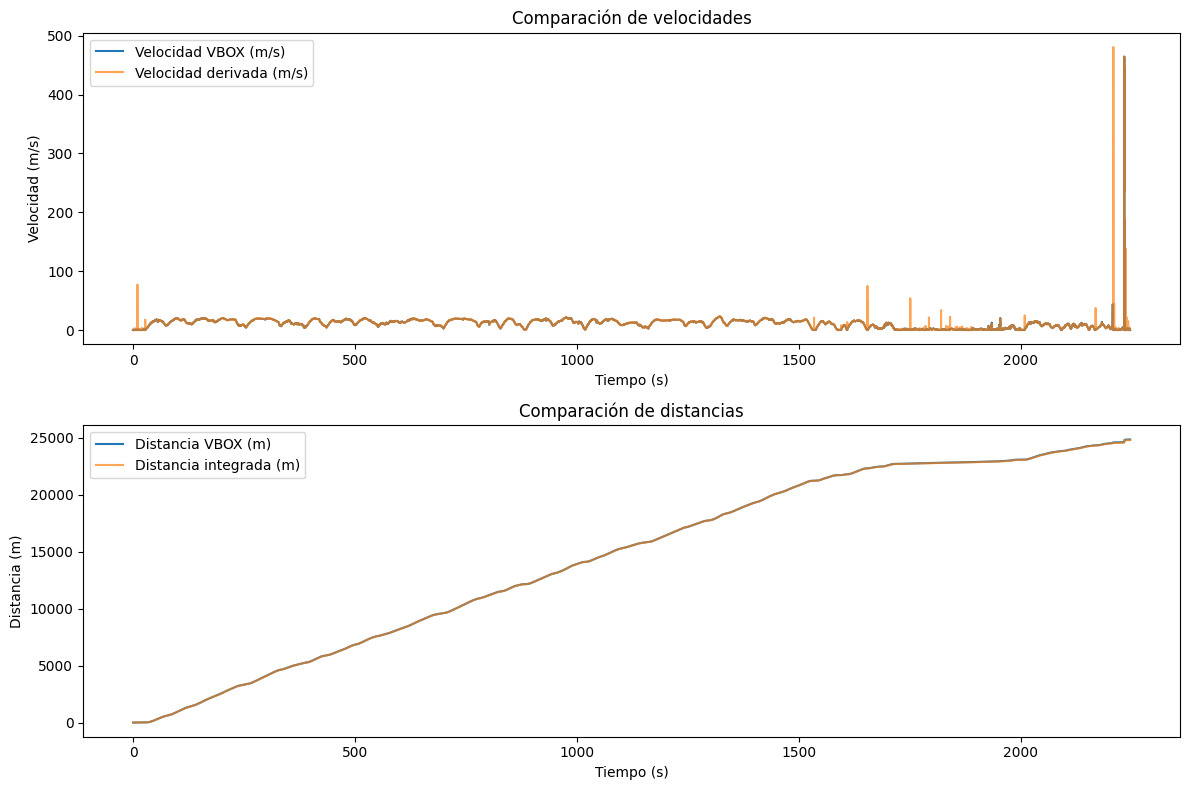

In [ ]:
df = pd.read_csv("bbox.csv", sep=";")

# Extraer columnas relevantes
t = df["Elapsed time (s)"].values
d_vbox = df["Distance (m)"].values
v_vbox_kmh = df["Speed (km/h)"].values

# Convertir velocidad a m/s
v_vbox = v_vbox_kmh * 1000 / 3600

# a. Derivar numericamente la distancia para obtener velocidad numérica
dt = np.diff(t)
dd = np.diff(d_vbox)
v_num = dd / dt   # velocidad derivada numéricamente

# Ahora como derivamos numéricamente vamos a perder un dato en cada uno de los arrays
# pues estamos usando diferencias entre puntos adyacentes
t_mid = (t[:-1] + t[1:]) / 2   # tiempos intermedios para graficar


# b. Integrar velocidad para obtener distancia
d_num = [0]  # acumulador de distancia integrada

for i in range(1, len(t)): # Por cada tiempo
    trap = 0.5 * (v_vbox[i] + v_vbox[i-1]) * (t[i] - t[i-1]) 
    d_num.append(d_num[-1] + trap)
    
d_num = np.array(d_num) # Lo volvemos un array

# c. Comparación simbólica (ejemplo de Sympy) ===
# Usamos sympy solo para mostrar la derivada simbólica genérica
time = symbols("time")
dist = symbols("dist", real=True, positive=True)
v = diff(dist, time)  # velocidad = d(distancia)/dt
print("Definición simbólica de velocidad:", v)

# === 5. Graficar ===
plt.figure(figsize=(12, 8))

# (a) Velocidad comparada
plt.subplot(2, 1, 1)
plt.plot(t, v_vbox, label="Velocidad VBOX (m/s)")
plt.plot(t_mid, v_num, label="Velocidad derivada (m/s)", alpha=0.7)
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.legend()
plt.title("Comparación de velocidades")

# (b) Distancia comparada
plt.subplot(2, 1, 2)
plt.plot(t, d_vbox, label="Distancia VBOX (m)")
plt.plot(t, d_num, label="Distancia integrada (m)", alpha=0.7)
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia (m)")
plt.legend()
plt.title("Comparación de distancias")

plt.tight_layout()
plt.show()
